In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
dataset=pd.read_csv("spam_email_dataset.csv")

In [3]:
dataset


,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,07:18,1,7,114,83,0,3,2,0,5,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,19:45,1,5,19,10,0,0,1,7,0,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,4,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1,1


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [4]:
dataset.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [5]:
dataset.columns

Index(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time',
       'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')

In [6]:
dataset.isnull()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

Email                0
Subject              0
Sender               0
Recipient            0
Date                 0
Time                 0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
dtype: int64

# This Dataset does not have null value

<Axes: xlabel='Link Count', ylabel='count'>

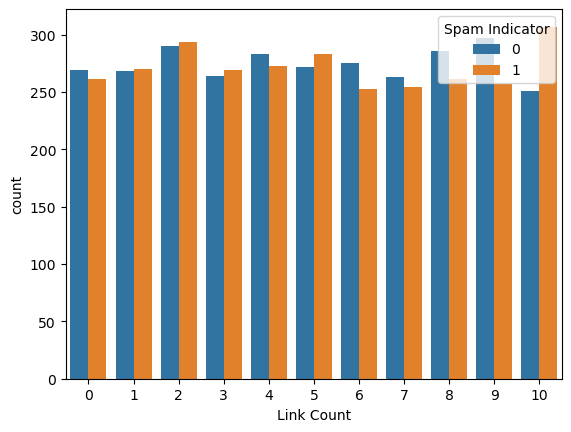

In [10]:
sns.countplot( x='Link Count' ,  data=dataset ,  hue='Spam Indicator')

<Axes: >

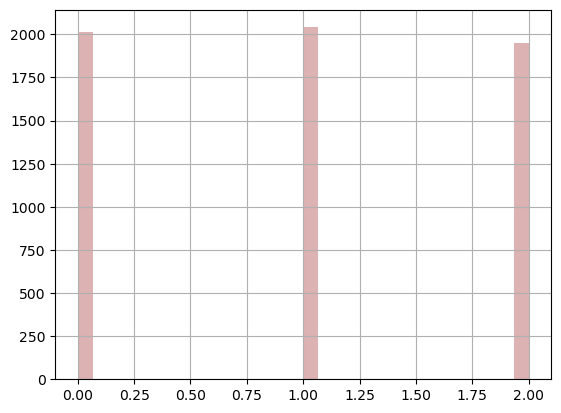

In [12]:
dataset['Dollar Count'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: >

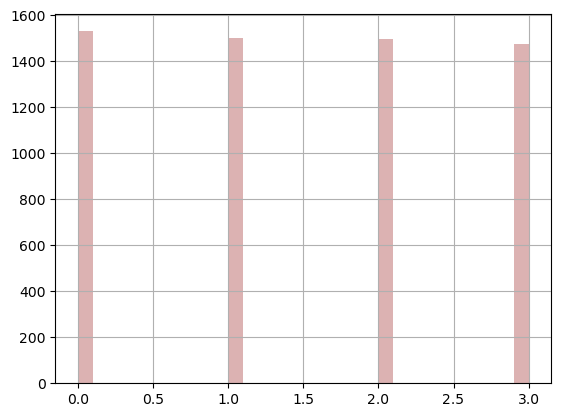

In [13]:
dataset['Question Count'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: >

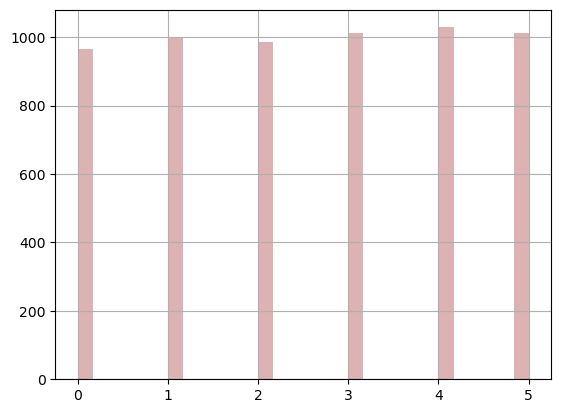

In [14]:
dataset['HTML Tags Count'].hist(bins=30,color='darkred',alpha=0.3)

In [17]:
html = pd.get_dummies(dataset['HTML Tags Count'],drop_first=True)
question = pd.get_dummies(dataset['Question Count'],drop_first=True)
dollar = pd.get_dummies(dataset['Dollar Count'],drop_first=True)
link = pd.get_dummies(dataset['Link Count'],drop_first=True)


In [30]:
dataset['html'] = dataset['html'].astype(str)

KeyError: 'html'

In [19]:
dataset.drop(['HTML Tags Count','Question Count','Dollar Count','Link Count', 'Recipient', 'Date', 'Time'],axis=1,inplace=True)

In [20]:
dataset.head()

,Email,Subject,Sender,Attachments,Word Count,Uppercase Count,Exclamation Count,Punctuation Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,3,191,32,3,11,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,3,45,1,2,8,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,3,52,1,4,10,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,2,75,6,0,8,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,3,299,279,0,6,1


In [21]:
dataset = pd.concat([dataset,html,question,dollar,link],axis=1)

KeyError: 'html'

In [22]:
dataset.head()

,Email,Subject,Sender,Attachments,Word Count,Uppercase Count,Exclamation Count,Punctuation Count,Spam Indicator,1,...,1,2,3,4,5,6,7,8,9,10
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,3,191,32,3,11,1,1,...,0,0,0,0,0,0,0,0,0,0
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,3,45,1,2,8,1,0,...,0,0,0,0,0,0,0,0,1,0
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,3,52,1,4,10,1,1,...,0,0,0,0,0,0,0,0,1,0
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,2,75,6,0,8,0,0,...,0,0,1,0,0,0,0,0,0,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,3,299,279,0,6,1,1,...,0,0,0,0,1,0,0,0,0,0


In [23]:
dataset.drop('Spam Indicator',axis=1).head()

,Email,Subject,Sender,Attachments,Word Count,Uppercase Count,Exclamation Count,Punctuation Count,1,2,...,1,2,3,4,5,6,7,8,9,10
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,3,191,32,3,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,3,45,1,2,8,0,1,...,0,0,0,0,0,0,0,0,1,0
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,3,52,1,4,10,1,0,...,0,0,0,0,0,0,0,0,1,0
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,2,75,6,0,8,0,1,...,0,0,1,0,0,0,0,0,0,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,3,299,279,0,6,1,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
dataset['Spam Indicator'].head()

0    1
1    1
2    1
3    0
4    1
Name: Spam Indicator, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Spam Indicator',axis=1), 
                                                    dataset['Spam Indicator'], test_size=0.20, 
                                                    random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.